# Dimensionality Reduction

In [2]:
%matplotlib inline

import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd

import sys
sys.path.append('/Users/kaonpark/workspace/github.com/likejazz/kaon-learn')
import kaonlearn
from kaonlearn.plots import plot_decision_regions

In [3]:
from sklearn.datasets import load_iris
iris = load_iris()

iris.data[:5]

array([[ 5.1,  3.5,  1.4,  0.2],
       [ 4.9,  3. ,  1.4,  0.2],
       [ 4.7,  3.2,  1.3,  0.2],
       [ 4.6,  3.1,  1.5,  0.2],
       [ 5. ,  3.6,  1.4,  0.2]])

In [4]:
classes = np.array(["sentosa", "versicolor", "virginica"])

iris_data = np.array(iris.data)
iris_data = pd.DataFrame(iris_data)
iris_data['species'] = pd.Series(
    classes[iris.target],
    index=iris_data.index, dtype=str)

iris_data = iris_data.rename(columns={
    0: 'sepal_length', 
    1: 'sepal_width', 
    2: 'petal_length', 
    3: 'petal_width'})

iris_data.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,sentosa
1,4.9,3.0,1.4,0.2,sentosa
2,4.7,3.2,1.3,0.2,sentosa
3,4.6,3.1,1.5,0.2,sentosa
4,5.0,3.6,1.4,0.2,sentosa


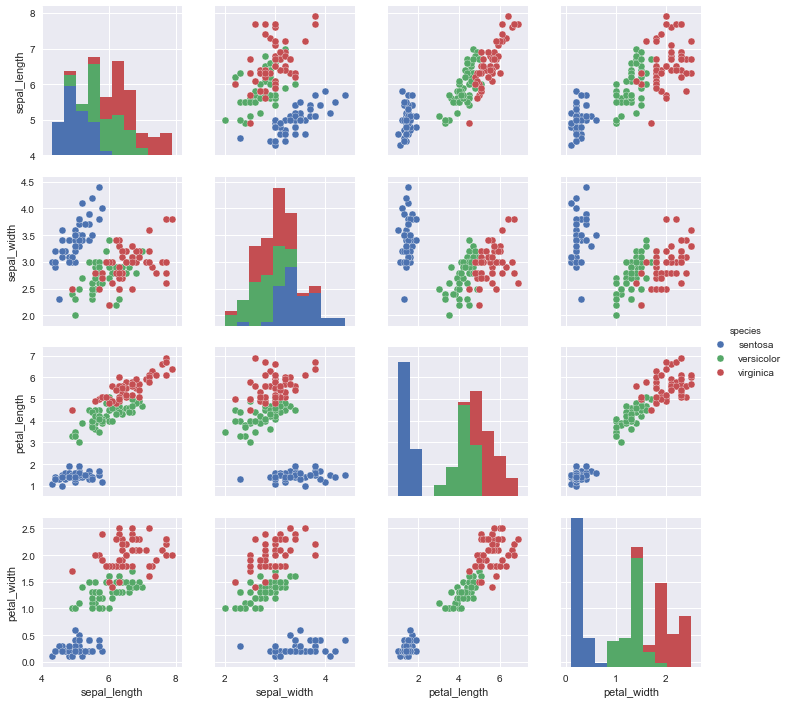

In [5]:
sns.pairplot(iris_data, hue="species")

In [6]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_scaled = scaler.fit_transform(iris.data)
iris.data[:3], X_scaled[:3]

(array([[ 5.1,  3.5,  1.4,  0.2],
        [ 4.9,  3. ,  1.4,  0.2],
        [ 4.7,  3.2,  1.3,  0.2]]),
 array([[-0.90068117,  1.03205722, -1.3412724 , -1.31297673],
        [-1.14301691, -0.1249576 , -1.3412724 , -1.31297673],
        [-1.38535265,  0.33784833, -1.39813811, -1.31297673]]))

In [7]:
from sklearn.decomposition import PCA
# keep the first two principal components of the data
pca = PCA(n_components=2)
# fit PCA model to beast cancer data
pca.fit(X_scaled)

# transform data onto the first two principal components
X_pca = pca.transform(X_scaled)
print("Original shape: {}".format(str(X_scaled.shape)))
print("Reduced shape: {}".format(str(X_pca.shape)))

Original shape: (150, 4)
Reduced shape: (150, 2)


In [8]:
from sklearn.pipeline import make_pipeline
from sklearn.svm import SVC
p = make_pipeline(SVC(C=1))
p.fit(X_pca, iris.target)

Pipeline(steps=[('svc', SVC(C=1, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape=None, degree=3, gamma='auto', kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False))])

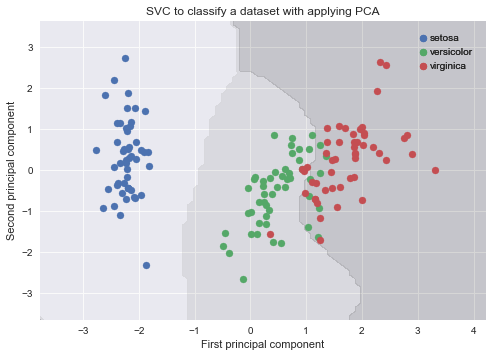

Score: 0.92


In [9]:
# plot fist vs second principal component, color by class
plt.xlabel("First principal component")
plt.ylabel("Second principal component")
plt.title("SVC to classify a dataset with applying PCA")
plot_decision_regions(X_pca, iris.target, p, target_names=iris.target_names, shows=True)


In [10]:
from sklearn.manifold import TSNE
tsne = TSNE(random_state=42)

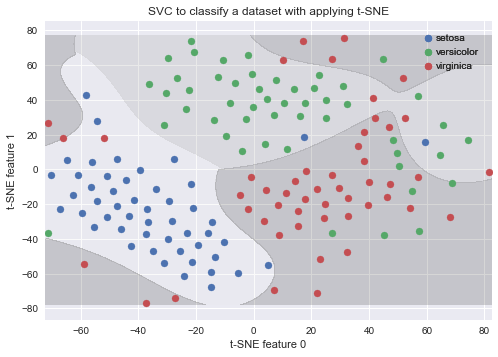

Score: 0.89


In [11]:
X_tsne = tsne.fit_transform(iris.data)

p = make_pipeline(SVC(C=1, gamma=0.001))
p.fit(X_tsne, iris.target)

plt.xlabel("t-SNE feature 0")
plt.ylabel("t-SNE feature 1")
plt.title("SVC to classify a dataset with applying t-SNE")
plot_decision_regions(X_tsne, iris.target, p, target_names=iris.target_names, shows=True)


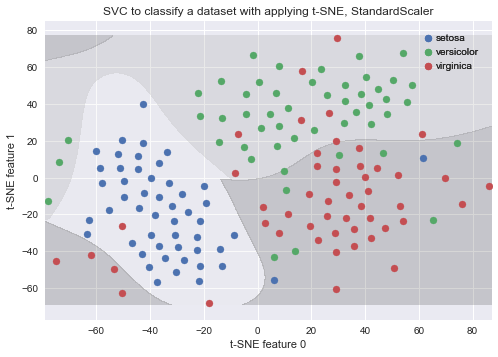

Score: 0.87


In [12]:
X_tsne = tsne.fit_transform(X_scaled)

p = make_pipeline(SVC(C=1, gamma=0.001))
p.fit(X_tsne, iris.target)

plt.xlabel("t-SNE feature 0")
plt.ylabel("t-SNE feature 1")
plt.title("SVC to classify a dataset with applying t-SNE, StandardScaler")
plot_decision_regions(X_tsne, iris.target, p, target_names=iris.target_names, shows=True)


In [13]:
import pandas as pd
# create a dataframe with an integer feature and a categorical string feature
demo_df = pd.DataFrame({'Integer Feature': [0, 1, 2, 1],
                        'Categorical Feature': ['socks', 'fox', 'socks', 'box']})
demo_df

,Categorical Feature,Integer Feature
0,socks,0
1,fox,1
2,socks,2
3,box,1


In [14]:
pd.get_dummies(demo_df)

,Integer Feature,Categorical Feature_box,Categorical Feature_fox,Categorical Feature_socks
0,0,0,0,1
1,1,0,1,0
2,2,0,0,1
3,1,1,0,0


In [15]:
demo_df['Integer Feature'] = demo_df['Integer Feature'].astype(str)
pd.get_dummies(demo_df, columns=['Integer Feature', 'Categorical Feature'])

,Integer Feature_0,Integer Feature_1,Integer Feature_2,Categorical Feature_box,Categorical Feature_fox,Categorical Feature_socks
0,1,0,0,0,0,1
1,0,1,0,0,1,0
2,0,0,1,0,0,1
3,0,1,0,1,0,0


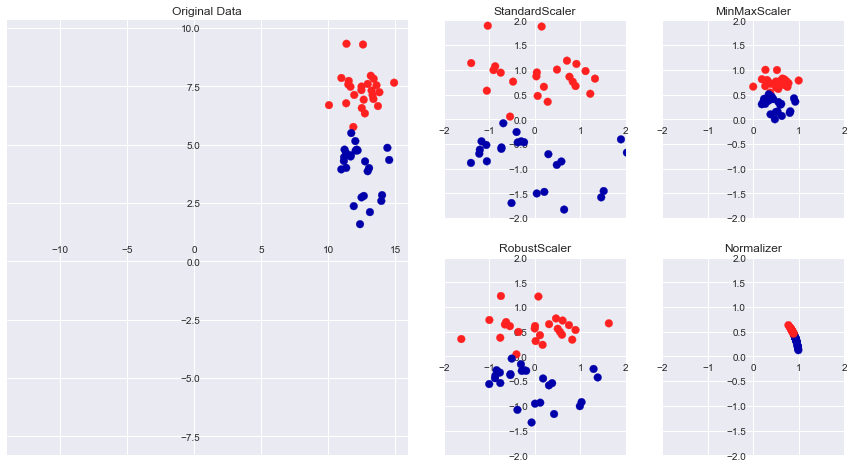

In [16]:
kaonlearn.plots.plot_scaling()

In [17]:
from sklearn.datasets import load_breast_cancer
from sklearn.decomposition import PCA
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler

cancer = load_breast_cancer()
cancer.data


array([[  1.79900000e+01,   1.03800000e+01,   1.22800000e+02, ...,
          2.65400000e-01,   4.60100000e-01,   1.18900000e-01],
       [  2.05700000e+01,   1.77700000e+01,   1.32900000e+02, ...,
          1.86000000e-01,   2.75000000e-01,   8.90200000e-02],
       [  1.96900000e+01,   2.12500000e+01,   1.30000000e+02, ...,
          2.43000000e-01,   3.61300000e-01,   8.75800000e-02],
       ..., 
       [  1.66000000e+01,   2.80800000e+01,   1.08300000e+02, ...,
          1.41800000e-01,   2.21800000e-01,   7.82000000e-02],
       [  2.06000000e+01,   2.93300000e+01,   1.40100000e+02, ...,
          2.65000000e-01,   4.08700000e-01,   1.24000000e-01],
       [  7.76000000e+00,   2.45400000e+01,   4.79200000e+01, ...,
          0.00000000e+00,   2.87100000e-01,   7.03900000e-02]])

Before we apply PCA, we scale our data so that each feature has unit variance using StandardScaler.

In [18]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(cancer.data)
X_scaled

array([[ 1.09706398, -2.07333501,  1.26993369, ...,  2.29607613,
         2.75062224,  1.93701461],
       [ 1.82982061, -0.35363241,  1.68595471, ...,  1.0870843 ,
        -0.24388967,  0.28118999],
       [ 1.57988811,  0.45618695,  1.56650313, ...,  1.95500035,
         1.152255  ,  0.20139121],
       ..., 
       [ 0.70228425,  2.0455738 ,  0.67267578, ...,  0.41406869,
        -1.10454895, -0.31840916],
       [ 1.83834103,  2.33645719,  1.98252415, ...,  2.28998549,
         1.91908301,  2.21963528],
       [-1.80840125,  1.22179204, -1.81438851, ..., -1.74506282,
        -0.04813821, -0.75120669]])

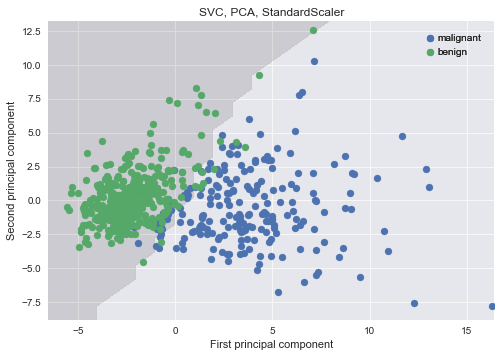

Score: 0.95


In [19]:
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

clf = SVC(C=1, gamma=0.01).fit(X_pca, cancer.target)

plt.xlabel("First principal component")
plt.ylabel("Second principal component")
plt.title("SVC, PCA, StandardScaler")
plot_decision_regions(X_pca, cancer.target, clf=clf, res=1, target_names=cancer.target_names, shows=True)

In [20]:
pca.components_

array([[ 0.21890244,  0.10372458,  0.22753729,  0.22099499,  0.14258969,
         0.23928535,  0.25840048,  0.26085376,  0.13816696,  0.06436335,
         0.20597878,  0.01742803,  0.21132592,  0.20286964,  0.01453145,
         0.17039345,  0.15358979,  0.1834174 ,  0.04249842,  0.10256832,
         0.22799663,  0.10446933,  0.23663968,  0.22487053,  0.12795256,
         0.21009588,  0.22876753,  0.25088597,  0.12290456,  0.13178394],
       [-0.23385713, -0.05970609, -0.21518136, -0.23107671,  0.18611302,
         0.15189161,  0.06016536, -0.0347675 ,  0.19034877,  0.36657547,
        -0.10555215,  0.08997968, -0.08945723, -0.15229263,  0.20443045,
         0.2327159 ,  0.19720728,  0.13032156,  0.183848  ,  0.28009203,
        -0.21986638, -0.0454673 , -0.19987843, -0.21935186,  0.17230435,
         0.14359317,  0.09796411, -0.00825724,  0.14188335,  0.27533947]])

In [21]:
pca.components_.shape

(2, 30)

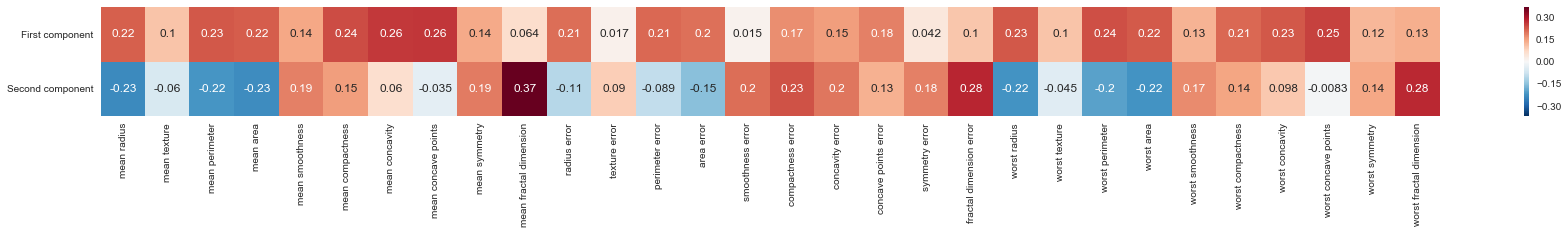

In [22]:
pca_data = pd.DataFrame(data=pca.components_, columns=cancer.feature_names)

plt.figure(figsize=(30,2))
sns.heatmap(pca_data, yticklabels=["First component", "Second component"], annot=True)

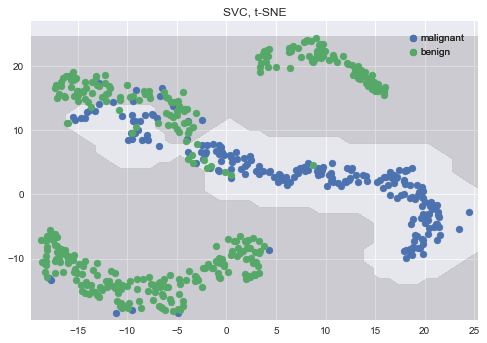

Score: 0.94


In [26]:
tsne = TSNE(n_components=2)
X_tsne = tsne.fit_transform(cancer.data)

clf = SVC(C=1, gamma=0.1).fit(X_tsne, cancer.target)

plt.title("SVC, t-SNE")
plot_decision_regions(X_tsne, cancer.target, clf=clf, res=1, target_names=cancer.target_names, shows=True)


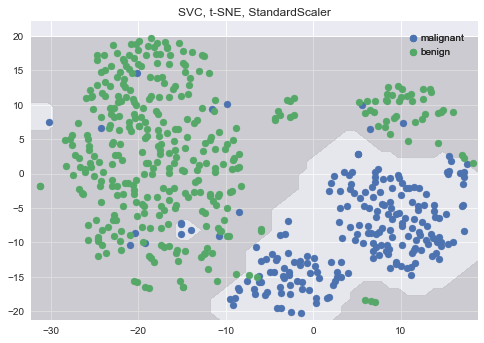

Score: 0.98


In [28]:
tsne = TSNE(n_components=2)
X_tsne = tsne.fit_transform(scaler.fit_transform(cancer.data))

clf = SVC(C=1, gamma=0.1).fit(X_tsne, cancer.target)

plt.title("SVC, t-SNE, StandardScaler")
plot_decision_regions(X_tsne, cancer.target, clf=clf, res=1, target_names=cancer.target_names, shows=True)
